# 스플라인
스플라인은 간단히 설명하면 특정 연속 조건 하에 조각 다항함수로 이해할 수 있고, 이를 모형 구축에 이용하면 데이터의 비선형적인 관계를 탐지해낼 수 있다. 
스플라인은 조각은 매듭점에 의해 정의되는데, 이 매듭점에 따라 스플라인의 복잡도가 결정된다고 이해할 수 있다.
매듭점이 정해지면 스플라인을 스플라인 기저 $\{B_j\}_{j=1}^J$ 의 선형결합으로 정의할 수 있다.
$$
\mathsf{s}_{\beta}(x) = \sum_{j = 1}^J \beta_j B_j(x), \quad x \in \mathbb{R}.
$$
스플라인 기저에는 여러 종류가 있지만, 여기서 가장 간단하게 구현할 수 있는 P-스플라인를 다루겠다.

## P-스플라인 기저
P-스플라인 기저는 크게 두 가지로 나눌 수 있다. 차수를 $r$, 매듭점을 $t_1, \ldots, t_K$ 로 정의하면 P-스플라인 기저는


$$
P_{k - r}(x) = x^k, \quad k = 0, \ldots, r, \quad \text{and} \quad 
P_{k}(x) = (x - t_k)^r_{+}, \quad k = 1, \ldots, K
$$

이다. 여기서 기저의 수는 $J = r + 1 + K$ 로 이해하면 된다. 
간단한 예로 차수가 $1$ 이고 매듭점이 $t_1$ 인 선형 스플라인 기저는

$$
P_{-1}(x) = 1, P_{0}(x) = x, P_{1}(x) = (x - t_1)_{+} 
$$

이다. 이를 코드로 구현해보기로 한다.

In [292]:
# P-스플라인 기저 생성
def Pspline_basis(x, knots, degree):
    n = len(x)
    J = len(knots) + degree + 1
    basis = np.zeros(n * J).reshape(n, J)
    # 다항식들
    for k in range(degree + 1):
        basis[:, k] = x ** k
    # 조각들
    for k in range(degree + 1, J):
        ind = (x - knots[k - degree - 1]) > 0
        basis[ind, k] = (x - knots[k - degree - 1])[ind] ** degree
    return basis

차수가 1 이고 매듭점이 0.5 에 주어진 P-스플라인 기저는 

$$
P_{-1}(x) = 1, P_{0}(x) = x, P_{1}(x) = (x - 0.5)_{+} 
$$

이며, 이를 구간 $[0, 1]$ 에 그려보자.

In [293]:
n = 100
x = np.linspace(0, 1, n)
degree = 1
knots = np.array([0.5])
basis = Pspline_basis(x, knots, degree)

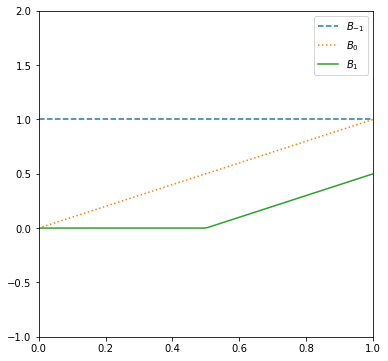

In [294]:
import matplotlib.pyplot as plt
plt.figure(figsize = (6, 6))
plt.xlim([0, 1]) 
plt.ylim([-1, 2]) 
plt.plot(x, basis[:, 0], linestyle = '--', label = r'$B_{-1}$')
plt.plot(x, basis[:, 1], linestyle = ':', label = r'$B_0$')
plt.plot(x, basis[:, 2], label = r'$B_1$')
plt.legend()
plt.show()

## 스플라인
언급했듯이, 스플라인은 스플라인 기저들의 선형결합으로 정의할 수 있다. 
생성한 기저 $B_{-1}, B_0, B_1$ 에 대해 스플라인 계수를 임의로 설정하여 그린 스플라인은 아래와 같다.
설정한 매듭점 $0.5$ 에서 분할된 조각 선형다항식인 것을 확인할 수 있다.

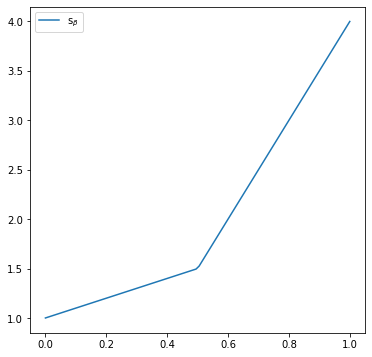

In [295]:
coef = np.array([1, 1, 4])
spline = np.dot(basis, coef)
plt.figure(figsize = (6, 6))
plt.plot(x, spline, label = r'$\mathsf{s}_{\beta}$')
plt.legend()
plt.show()

## 예제
스플라인의 차수와 매듭점을 다르게 설정하여 스플라인을 그려보도록 하자. 
먼저, 차수를 1 로 설정하고 매듭점의 수를 증가시키면 상대적으로 복잡한 선형 스플라인이 되는 것을 아래 그림을 통해 확인할 수 있다.

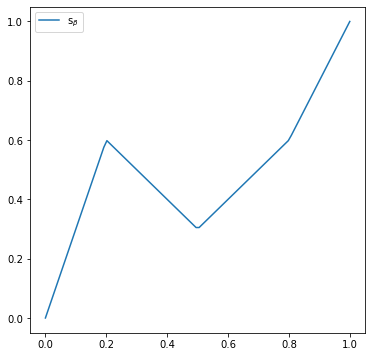

In [296]:
degree = 1
plt.figure(figsize = (6, 6))
knots = np.array([0.2, 0.5, 0.8])
basis = Pspline_basis(x, knots, degree)
coef = np.array([0, 3, -4, 2, 1])
spline = np.dot(basis, coef)
plt.plot(x, spline, label = r'$\mathsf{s}_{\beta}$')
plt.legend()
plt.show()

차수를 3 으로 설정하여 그린 큐빅 스플라인은 다음과 같다. 스플라인의 형태가 매끄러운 것을 확인해 볼 수 있다.

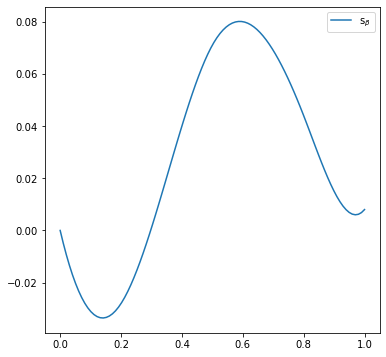

In [297]:
degree = 3
plt.figure(figsize = (6, 6))
knots = np.array([0.2, 0.5, 0.8])
basis = Pspline_basis(x, knots, degree)
coef = np.array([0, -0.5, 2, -1, -2, 4, 4])
spline = np.dot(basis, coef)
plt.plot(x, spline, label = r'$\mathsf{s}_{\beta}$')
plt.legend()
plt.show()

매듭점의 수가 증가할수록 스플라인의 형태가 복잡해진다. 참고로, 매듭점의 수 뿐만 아니라 위치가 스플라인의 형태를 크게 변형시킨다(선형 스플라인에서 매듭점이 0.5 대신 0.1 혹은 0.9 로 설정되었다고 가정해보자!).
보다 많은 예제를 다루어보면, 매듭점과 스플라인 계수를 적절하게 선택한다면 굉장히 다양하고 복잡한 함수를 표현하고 근사할 수 있다는 것을 알 수 있을 것이다. 